# File Size Monitor (idea sketch)

This sketch scrapes the raw data archive using the pycamhd toolbox and then plots file size over time using matplotlib and bokeh. The next step would be to add hover over point info tools to either plotting option (whichever performs best) as well as set up an email alert system when unexpected conditions are met. This notebook or script could run in a continuous loop that executes and updates every 24 hours on the camhdhub.

### Use pycamhd to scrape the raw data archive for file sizes

In [2]:
import pycamhd
import datetime
%matplotlib inline

In [3]:
file_list_dict = pycamhd.get_file_list()

In [4]:
x = []
for i in range(len(file_list_dict[0])):
    x.append(file_list_dict[0][i][94:-4])
x = dict(zip(x,file_list_dict[1]))
file_timestamp = []
file_size = []
for key, value in x.iteritems():
    year = int(key[0:4])
    month = int(key[4:6])
    day = int(key[6:8])
    hour = int(key[9:11])
    minute = int(key[11:13])
    dt = datetime.datetime(year, month, day, hour, minute)
    file_timestamp.append(dt)
    file_size.append(value)

### Plot the data using matplotlib

In [5]:
import matplotlib.dates as dates
import matplotlib.pylab as plt

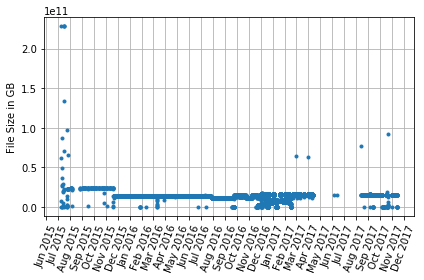

In [6]:
fig, ax = plt.subplots();
months = dates.MonthLocator()  # every month
monthsFmt = dates.DateFormatter('%b %Y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.plot(file_timestamp, file_size, linestyle='None', marker='.', picker=True)
plt.xticks(rotation=70)
plt.ylabel('File Size in GB')
plt.grid()
plt.gcf().subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

### Plot the data using bokeh

In [56]:
import numpy as np
import bokeh.plotting as bp
from bokeh.io import output_notebook

output_notebook()
tools='pan,box_zoom,reset'
# bp.output_file('plot.html')

Loading BokehJS ...

In [57]:
p = bp.figure(tools=tools, plot_width=800, plot_height=600, x_axis_type='datetime', y_axis_label= 'File Size in GB')
p.circle(file_timestamp, file_size, size=5, color="navy")
bp.show(p)

In [ ]:
import pandas as pd

In [58]:
df = pd.DataFrame({'time_stamp': file_timestamp, 'size' : file_size})
good = df[df['size'] > 10000000000]
good = good[good['size'] < 18000000000]
# good.set_index('time_stamp')

In [55]:
file_size = list(good['size'].values)
file_timestamp = list(good['time_stamp'].values)

In [ ]:
15626823725
10000000000

In [41]:
good

,size,time_stamp
0,15626823725,2017-01-01 11:20:00
1,15228642757,2017-02-18 18:15:00
3,15352430417,2017-03-24 00:15:00
4,15887043373,2016-12-10 12:03:00
6,15868655597,2017-01-20 23:52:00
8,13903540493,2016-05-24 09:00:00
9,13966710177,2016-06-19 00:00:00
10,15137376041,2017-08-31 06:15:00
11,15799423917,2017-04-02 19:30:00
12,13970890177,2016-01-29 15:00:00


In [26]:
df

,size,time_stamp
0,15626823725,2017-01-01 11:20:00
1,15228642757,2017-02-18 18:15:00
2,6160255393,2017-02-05 00:15:00
3,15352430417,2017-03-24 00:15:00
4,15887043373,2016-12-10 12:03:00
5,9226730473,2016-12-25 18:14:00
6,15868655597,2017-01-20 23:52:00
7,57687129,2015-07-11 00:32:00
8,13903540493,2016-05-24 09:00:00
9,13966710177,2016-06-19 00:00:00


### Send email alerts when conditions are met (under construction)

In [ ]:
# import smtplib
# def sendEmail(msg):
#     server = smtplib.SMTP('smtp.gmail.com:587')
#     server.ehlo()
#     server.starttls()
#     server.login("sender@email", "password")
#     server.sendmail("recipient1@email", "recipient2@email", msg)
# when condition:
#     sendEmail(msg)

### Run notebook and update plots every 24 hours (under construction)

In [ ]:
# while True:
#     run_notebook()
#     time.sleep(secs)
